<a href="https://colab.research.google.com/github/CarlosOliv71/Pos-Graduacao-de-Ciencia-de-Dados-da-Unicarioca/blob/main/Trab_P%C3%B3s_AnaliseComputacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pós-Graduação em Ciência de Dados - Análise Computacional e Qualitativa de Dados**

# Descrição

**Pesquisa realizada sobre amostra de alunos dos cursos de Informática e Engenharia para identificar a modalidade de aulas (Remota, Híbrida e Presencial) preferida dos alunos.**

In [2]:
#Instalação das bibliotecas
install.packages("readxl")
library(readxl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
# Importação do arquivo Pesquisa.xlsx
file_path <- "pesquisa.xlsx"


In [5]:
# Carregando a base de dados no dataframe (df)
df <- read_excel(file_path)


Impressão e Tratamento da base de dados

In [6]:
# Listando a base de dados
print(df)

# A tibble: 457 × 6
   TURMA DISCIPLINA PERÍODO    SEXO      PESQ1 PESQ2
   <chr> <chr>      <chr>      <chr>     <chr> <chr>
 1 T126  ALG-I      1º Período Masculino 0     NA   
 2 T126  ALG-I      1º Período Masculino 0     NA   
 3 T126  ALG-I      1º Período Masculino P     P    
 4 T126  ALG-I      1º Período Masculino 0     NA   
 5 T126  ALG-I      1º Período Masculino H     H    
 6 T126  ALG-I      1º Período Masculino 0     NA   
 7 T126  ALG-I      1º Período Masculino 0     NA   
 8 T126  ALG-I      1º Período Masculino 0     NA   
 9 T126  ALG-I      1º Período Masculino 0     NA   
10 T126  ALG-I      1º Período Feminino  P     P    
# ℹ 447 more rows


In [7]:
library(ggplot2)

# Análise do Percentual de Alunos por sexo

In [8]:
# Criando o 'df' dataframe e 'sexo' é a coluna que quero usar
# calculando a contagem de cada sexo e a porcentagem
contador_sexo <- df %>%
  group_by(SEXO) %>%
  summarise(n = n()) %>%
  mutate(percentage = n / sum(n) * 100)

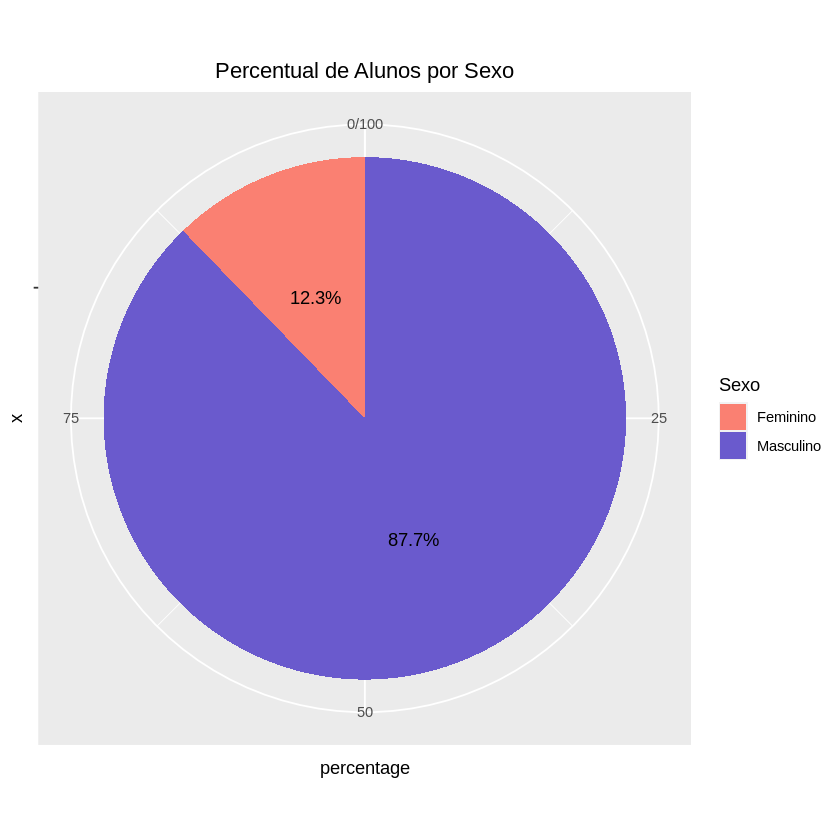

In [9]:
# Gerando um gráfico de pizza

ggplot(data = contador_sexo, aes(x = "", y = percentage, fill = SEXO)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") +
  scale_fill_manual(values = c("Masculino" = "slateblue", "Feminino" = "salmon")) +
  labs(title = "Percentual de Alunos por Sexo", fill = "Sexo") +
  theme(plot.title = element_text(hjust = 0.5)) +
  #theme_void() +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5))



# Análise da Quantidade de Alunos por Modalidade de Aulas

Conclusão: Os alunos, em sua maioria, optam pelas aulas na modalidade remota.

In [10]:
library(dplyr)

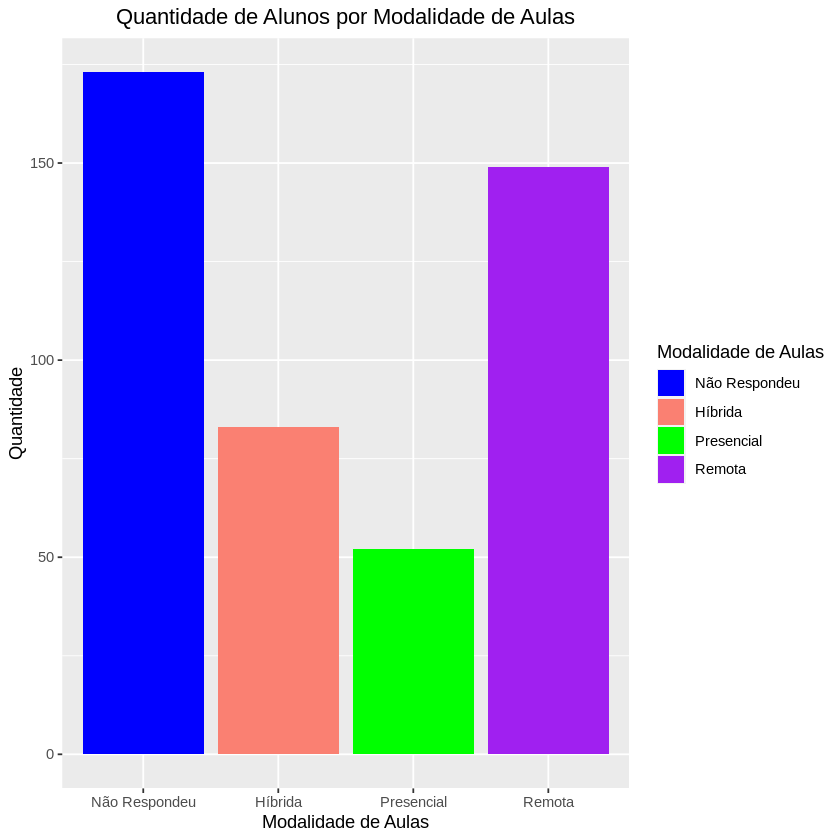

In [11]:
# Gerando um gráfico de barras
pesq1_conts <- df %>%
  group_by(PESQ1) %>%
  summarise(count = n())

ggplot(pesq1_conts, aes(x = PESQ1, y = count, fill = PESQ1)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("R" = "purple", "H" = "salmon", "0" = "blue", "P" = "green"),
                    name = "Modalidade de Aulas",
                    labels = c("R" = "Remota", "H" = "Híbrida", "0" = "Não Respondeu", "P" = "Presencial")) +
  scale_x_discrete(labels = c("0" = "Não Respondeu", "P" = "Presencial", "H" = "Híbrida", "R" = "Remota")) +
  labs(title = "Quantidade de Alunos por Modalidade de Aulas",
       x = "Modalidade de Aulas",
       y = "Quantidade") +
  theme(plot.title = element_text(hjust = 0.5))


# Análise do Quantidade de Alunos por Modalidade de Aulas (Percentual)

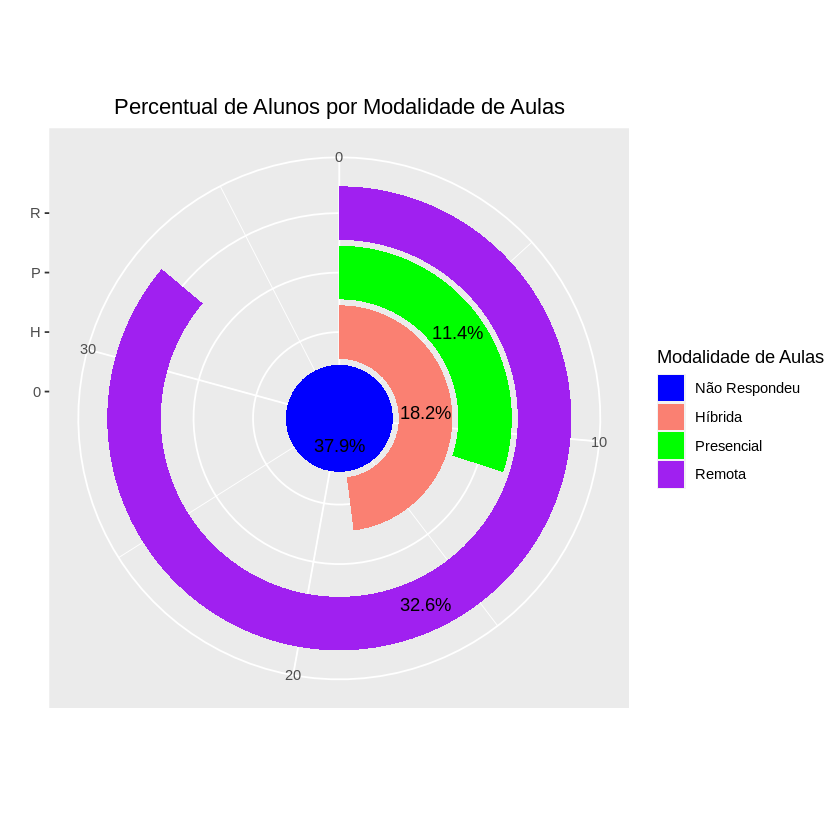

In [30]:
# Gerando um gráfico de pizza por percentual
pesq1_conts <- df %>%
  group_by(PESQ1) %>%
  summarise(n = n()) %>%
  mutate(percentage = n / sum(n) * 100)

ggplot(pesq1_conts, aes(x = PESQ1, y = percentage, fill = PESQ1)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") +
  scale_fill_manual(values = c("R" = "purple", "H" = "salmon", "0" = "blue", "P" = "green"),
                    name = "Modalidade de Aulas",
                    labels = c("R" = "Remota", "H" = "Híbrida", "0" = "Não Respondeu", "P" = "Presencial")) +
  #scale_x_discrete(labels = c("0" = "Não Respondeu", "P" = "Presencial", "H" = "Híbrida", "R" = "Remota")) +
  labs(title = "Percentual de Alunos por Modalidade de Aulas",
       x = "",
       y = "") +
  theme(plot.title = element_text(hjust = 0.5)) +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5))

# Análise das Escolhas dos Alunos divididos por Sexo

Conclusão: Majoritariamente os alunos do sexo masculino optaram pela modalidade de aulas remota.

In [13]:
# Removendo os itens não respondidos
df_filtered <- df %>%
  filter(PESQ1 != "Não Respondido")

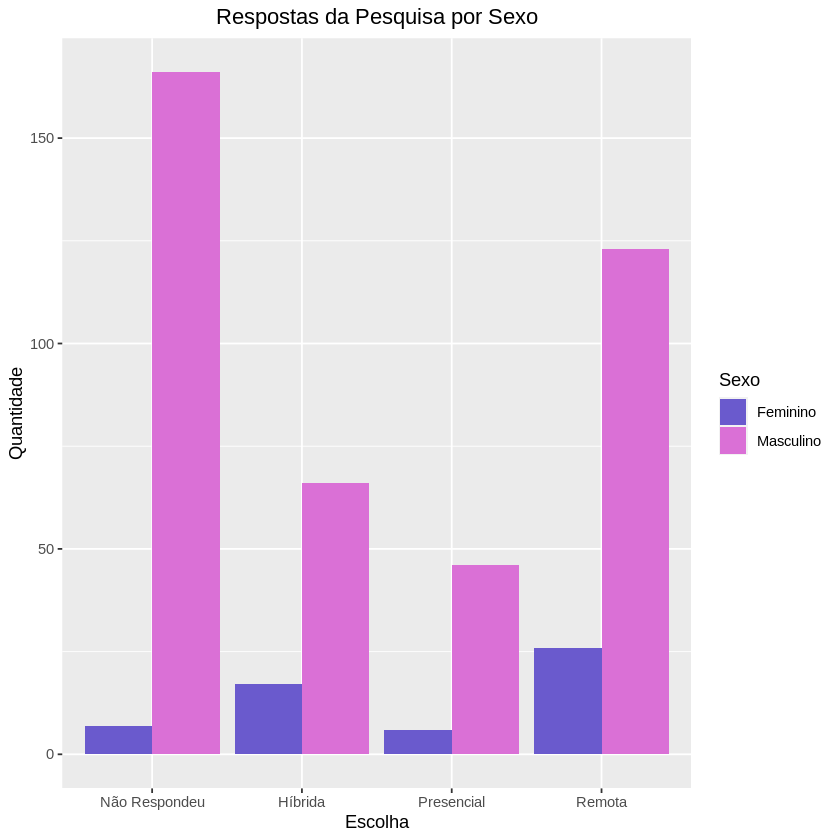

In [14]:
# Gerando um gráfico de barras
ggplot(df_filtered, aes(x = PESQ1, fill = SEXO)) +
  geom_bar(position = "dodge") +
  labs(title = "Respostas da Pesquisa por Sexo", x = "Escolha", y = "Quantidade") +
  scale_fill_manual(values = c("Masculino" = "orchid", "Feminino" = "slateblue"),
              name = "Sexo") +
  scale_x_discrete(labels = c("0" = "Não Respondeu", "P" = "Presencial", "H" = "Híbrida", "R" = "Remota")) +
  theme(plot.title = element_text(hjust = 0.5))
  #theme_minimal()

# Análise das Escolhas do Alunos por Período

Conclusão: Os alunos do 1º período são a excessão preferindo aulas presenciais. Os alunos dos demais períodos tem predileção pela modalidade remota de aulas.

In [15]:
# Removendo os itens não respondidos
df_filtered <- df %>%
  filter(PESQ1 != "Não Respondido")

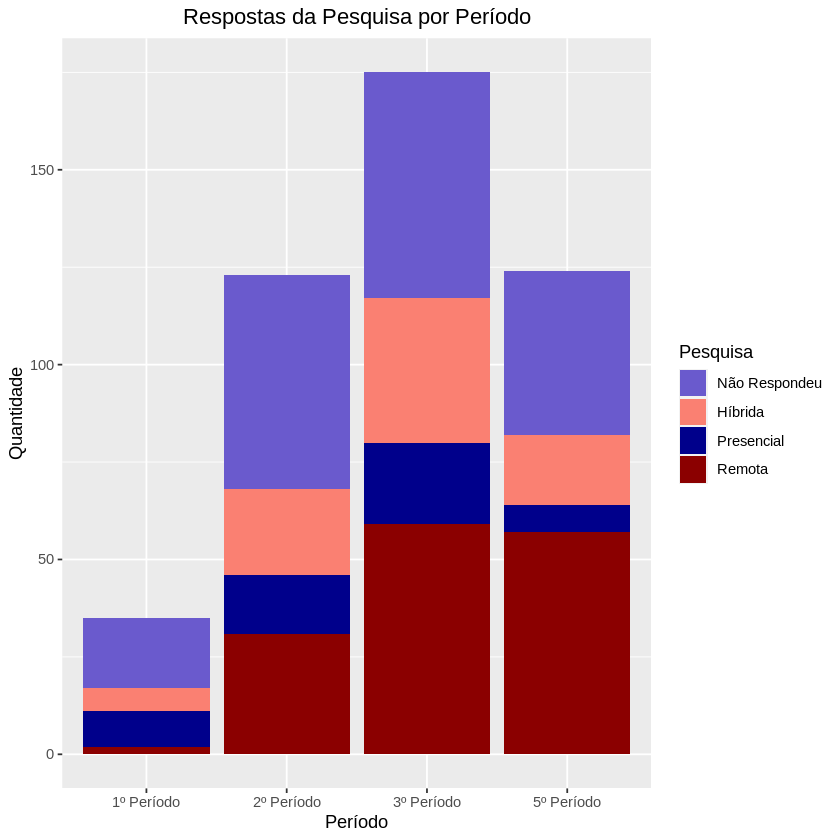

In [16]:
# Gerando um gráfico de pilhas
ggplot(df_filtered, aes(x = PERÍODO, fill = PESQ1)) +
  geom_bar(position = "stack") +
  labs(title = "Respostas da Pesquisa por Período", x = "Período", y = "Quantidade") +
  scale_fill_manual(values = c("H" = "salmon", "R" = "darkred", "P" = "darkblue", "0" = "slateblue"),
              name = "Pesquisa",
              labels = c("R" = "Remota", "H" = "Híbrida", "0" = "Não Respondeu", "P" = "Presencial")) +
  scale_x_discrete(labels = c("0" = "Não Respondeu", "P" = "Presencial", "H" = "Híbrida", "R" = "Remota")) +
  theme(plot.title = element_text(hjust = 0.5))
#theme_minimal()

# Análise das Escolhas do Alunos por Disciplina

Conclusão: A modalidade de aulas remotas é a opção da maioria dos alunos nas disciplinas PROC_EST, ALG-II e EST. Na disciplina ALG-I a modalidade preferida é a presencial.

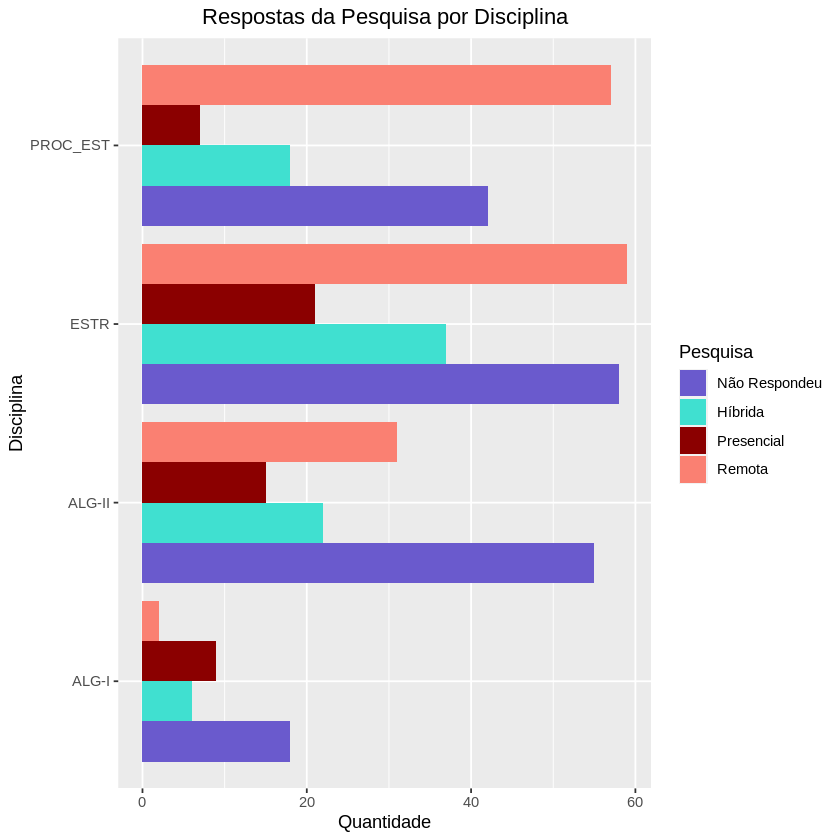

In [17]:
# Gerando um gráfico de barras horizontais
ggplot(df_filtered, aes(x = DISCIPLINA, fill = PESQ1)) +
  geom_bar(position = "dodge") +
  labs(title = "Respostas da Pesquisa por Disciplina", x = "Disciplina", y = "Quantidade") +
  scale_fill_manual(values = c("H" = "turquoise", "R" = "salmon", "P" = "darkred", "0" = "slateblue"),
              name = "Pesquisa",
              labels = c("R" = "Remota", "H" = "Híbrida", "0" = "Não Respondeu", "P" = "Presencial")) +
  scale_x_discrete(labels = c("0" = "Não Respondeu", "P" = "Presencial", "H" = "Híbrida", "R" = "Remota")) +
  theme(plot.title = element_text(hjust = 0.5)) +
  #theme_minimal() +
  coord_flip()

# Outra opção de Exibição por Disciplinas

Exibindo um gráfico para cada disciplina.

In [18]:
library(ggplot2)

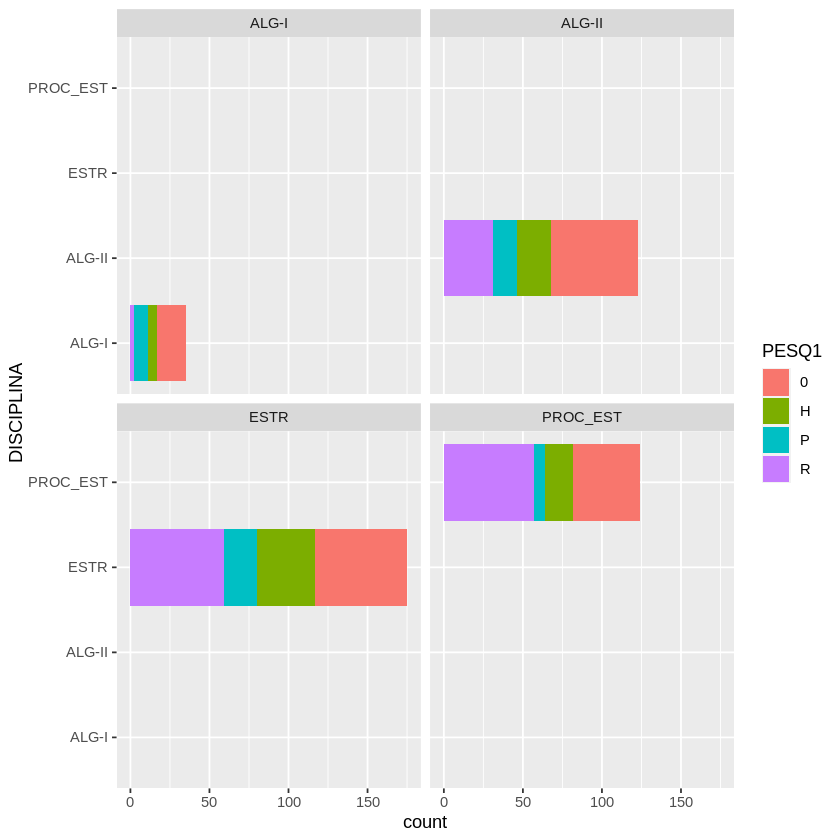

In [24]:
# Gerando um gráfico de barras para cada disciplina
ggplot(df_filtered, aes(x = DISCIPLINA, fill = PESQ1)) +
  geom_bar(position = "stack") +
  coord_flip() +
  facet_wrap(facets = vars(DISCIPLINA))